# Version-1
- Simple vanilla network with no Dropout, no BatchNormalization, no variable Learning Rate, no larger batch size, and only Adam optimizer
- Summary:
  - Total Parameters: 500,554
  - First epoch validation accuracy: 98.27%
  - Max validation accuracy in 25 epochs: 99.27% (in 4th epoch)
  - Batch Size: 32
- The purpose of this version is to decide the model architecture and number of layers.
- Number of layers are decided based on the **Receptive Field**
- The input image size is 28x28. Input images contains hand written digits which are around 26x26 so receptive field of 26x26 is needed to have better classification results
- Before 2014, it was a common practise to follow the below mentioned model architecture
![](https://github.com/Shilpaj1994/DeepVision/blob/master/Assignment-4/data/2014.png?raw=true)
- After 2014, the fully connected layers in the above architecture were replaced by 1x1 convolutions
- After 2016, all the modern architectures started using blocks in the network like convolution block, transition block, output block, etc.
- For this version, the architecture is designed in such a way that it contains 2-convolution blocks, 2-transition blocks and 1-output block  
![](https://github.com/Shilpaj1994/DeepVision/blob/master/Assignment-4/data/model.png?raw=true)  *Diagram only for reference*

- **Convolution Block:**
  - It contains number of convolution layer with increasing number of kernels
  - The idea behind this is, as we decrease dimension of the image, we increase number of kernels to extract more complex information to compensate for the loss of information
  
- **Transition Block:**
  - It contains 1x1 convolution layer with/without MaxPooling layer
  - The 1x1 convolution is used to combine the features in the channels and carry forward only important features
  - This helps in reducing the number of channel
  
- **Output Block:**
  - It contains convolution layer without activation. The activation is not provided since softmax activation is present for classification
  - It reduces the output number of channels equal to number of classes in the dataset
  - Flatten layer convert the multi-dimensional data into a vector
  - Softmax activation gives classification of the input image.
- 98.27% validation accuracy in first epoch shows that it is a potentially good model to work on.
- Thus, the model architecture is decided in this version.
---

### Install Dependencies 

- To train the following network, we use a framework named Keras.
- Keras provides functions for Convolution layers, Activation layers, MaxPooling layer, etc. so we don't need write code for designing such layers. Instead we can focus on creating better network architecture
- Following lines of code installs Keras on the system

In [0]:
# https://keras.io/
!pip install -q keras
import keras

### Import Libraries and Modules

In [0]:
# Import Numpy for matrices and multi-dimensional array's processing
import numpy as np

# Import Sequential to write model layer-by-layer in sequence 
from keras.models import Sequential

# Import Flatten layer to flatten feature-map, Dropout to avoid overfitting
from keras.layers import Flatten, Dropout, Activation

# Import Convolution layer to perform convolution on the channels, MaxPooling to reduce dimensions of channel
from keras.layers import Convolution2D, MaxPooling2D

# Import np_utils for one-hot-encoding
from keras.utils import np_utils

# Import hand written dataset of numbers from 0-9
from keras.datasets import mnist

### Load the Data
The data is loaded in following variables:

- X_train: Samples used during training the network
- y_train: Corresponding labels for training data
- X_test: Samples used for validation after training the network
- y_test: Corresponding labels for the validation of network's performance

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Dataset Information and Display Data Sample
- We have 60000 images in training dataset
- We have 10000 images in the testing dataset
- Each image's dimension are 28x28x1

(60000, 28, 28)
(10000, 28, 28)


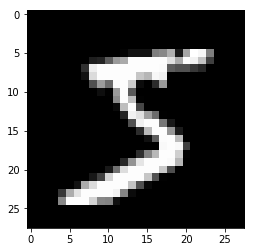

In [38]:
# Dimensions of the training dataset images
print (X_train.shape)

# Dimensions of the testing dataset images
print (X_test.shape)

# Import python module for plotting the image
from matplotlib import pyplot as plt

# Below line is written to display an image in this notebook
%matplotlib inline

# Plotting first image in the training dataset
# cmap='gray' displays the data sample in appropriate color space
plt.imshow(X_train[0], cmap='gray')

### Reshape the dataset
- Keras requires the input data in a form of 4D tensor
- The first value represents the total number of images in a training/testing dataset
- Second and third values are dimensions of an image
- Fourth value is the number of channels (1 for grayscale and 3 for RGB)  

Thus, the X_train will have a shape of (60000, 28, 28, 1)  
and the X_test will have a shape of (1000, 28, 28, 1)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Normalizing the Data
- When a Kernel is convolved over an input image, the maximum pixel value in the feature-map depends upon the maximum pixel value in the kernel
- Different kernels will have different maximum values and so their corresponding feature-maps will have different maximum values
- The feature-map with greater maximum pixel value will be louder while training the network
- To avoid biased activations of such kernels, we perform Normalization
- For normalization, we first convert the data into float so that we can get all the decimal values
- By dividing all the pixels by 255, all the pixel values will be restricted between 0.0 to 1.0. This is how we normalize the data.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Print Labels

In [41]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### One-Hot Encoding
- It is way of representing labels
- Instead of using one-single scalar for labels, we use a vector to represent the labels.
- The position of the ground-truth is marked as 1 while other positions are marked as 0
- The network cannot print out the prediction as 0,1,2,....9
- Instead it can activate the neuron associated with these numbers. So, the last layer before activation layer has number of neurons equal to number of classes (in this case 10)
- The neuron associated with the number is set as 1 while other neurons are set as 0. Following is the pattern in which encoding is done:  
  - Number 0 is encoded as 1000000000  
  - Number 1 is encoded as 0100000000  
  - Number 2 is encoded as 0010000000  
   .  
   .  
   .  
   .  
  - Number 9 is encoded as 0000000001

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Print Labels after one-hot encoding

In [43]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Model Architecture

- Model is defined sequential
- The model has convolution, maxpooling, flatten and softmax layers

- **Convolution Layer:**
  - It is a process of extracting features from a channel using a kernel (feature extractor)
![](https://github.com/Shilpaj1994/Phase1_assignments/blob/master/Assignment%201/5-3ConvolutionSmall.gif?raw=true)

- **MaxPooling Layer:**
  - It reduces the dimension of an channel. If we use MaxPooling of 2x2, dimension of an channel will become half of input channel
  - It only passes the louder pixel value in the next layer
![](https://github.com/Shilpaj1994/Phase1_assignments/blob/master/Assignment%203/Files/maxpool.gif?raw=true)

- **Softmax Layer:**
  - It is like probability
  - It gives score of a class between 0 and 1
![](https://github.com/Shilpaj1994/Phase1_assignments/blob/master/Assignment%201/softmax.png?raw=true)

- **Flatten Layer:**
  - It flattens the input dimension
  - Multiple 2D channels are converted into a vector 

In [44]:
# For reproducable results
np.random.seed(7)

# Define Sequential Model Type
model = Sequential()

# Convolution Block
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1), name='conv_1'))   # Layer 1: Input:28x28x01  |  Kernels:(3x3x01)x32  |  Output:26x26x32  |  Receptive Field:3x3 
model.add(Convolution2D(64, 3, 3, activation='relu', name='conv_2'))                          # Layer 2: Input:26x26x32  |  Kernels:(3x3x32)x64  |  Output:24x24x64  |  Receptive Field:5x5  
model.add(Convolution2D(128, 3, 3, activation='relu', name='conv_3'))                         # Layer 3: Input:24x24x64  |  Kernels:(3x3x64)x128 |  Output:22x22x128 |  Receptive Field:7x7

# Transition Block
model.add(Convolution2D(32, 1, 1, activation='relu', name='conv_4_1x1'))                      # Layer 4: Input:22x22x128 |  Kernels:(1x1x16)x32  |  Output:22x22x32  |  Receptive Field:7x7 
model.add(MaxPooling2D(2, name='MP'))                                                         # Layer 5: Input:22x22x32  |    MaxPooling:(2x2)   |  Output:11x11x32  |  Receptive Field:14x14 

# Convolution Block
model.add(Convolution2D(64, 3, 3, activation='relu', name='conv_5'))                          # Layer 6: Input:11x11x32  |  Kernels:(3x3x32)x64  |  Output:9x9x64  |  Receptive Field:16x16 
model.add(Convolution2D(128, 3, 3, activation='relu', name='conv_6'))                         # Layer 7: Input:09x09x64  |  Kernels:(3x3x64)x128 |  Output:7x7x128 |  Receptive Field:18x18 
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv_7'))                         # Layer 8: Input:07x07x128 | Kernels:(3x3x128)x256 |  Output:5x5x256 |  Receptive Field:20x20 

# Transition-ish Block
model.add(Convolution2D(32, 1, 1, activation='relu', name='conv_8_1x1'))                      # Layer 9: Input:5x5x256   |  Kernels:(1x1x256)x32 |  Output:5x5x32  |  Receptive Field:22x22

# Output Block
model.add(Convolution2D(10, 5, name='conv_9'))                                                # Layer 10: Input:5x5x32   |  Kernels:(5x5x32)x10  |  Output:1x1x10  |  Receptive Field:27x27 
model.add(Flatten())                                                                          # Layer 11: Input:1x1x10   |  Output:10
model.add(Activation('softmax'))                                                              # Layer 12: Activation Layer

# Summaries above architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 64)        18496     
_________________________________________________________________
conv_3 (Conv2D)              (None, 22, 22, 128)       73856     
_________________________________________________________________
conv_4_1x1 (Conv2D)          (None, 22, 22, 32)        4128      
_________________________________________________________________
MP (MaxPooling2D)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv_5 (Conv2D)              (None, 9, 9, 64)          18496     
_________________________________________________________________
conv_6 (Conv2D)              (None, 7, 7, 128)         73856     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1..., name="conv_1")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="conv_2")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="conv_3")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu", name="conv_4_1x1")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="conv_5")`
  app.l

### Compile Model
- **Loss Function:**
  - Loss function is used to calculate the error  between the prediction and actual label
  - Using optimizer, we reduce the value of loss function as much as possible
  - [More about cross-entropy loss](https://towardsdatascience.com/demystifying-cross-entropy-e80e3ad54a8)

- **Optimizer:**
  - Optimizers decide by how much value the weights should be changed while training the network 
  - Adam (Adaptive Moment Estimation) uses a complicated exponential decay that consists of the average and the variance of the previous steps.
  - [More about optimizers](http://ruder.io/optimizing-gradient-descent/index.html#rmsprop)
  
- **Metrics:**
  - The training progress of the model is calculated in terms of metrics used
  - Here, we monitor the progress of the training in terms of accuracy

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the Model
- Model is trained on training images and its labels
- Model is trained on batch_size of 32 that is, 32 images are passed through the network at a time
- The model is trained on the dataset for 10 iterations (epochs)
- Verbose 1 means it will print all the training information

In [46]:
model.fit(X_train, Y_train, batch_size=32, epochs=25, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 27s 448us/step - loss: 0.1299 - acc: 0.9600 - val_loss: 0.0519 - val_acc: 0.9827
Epoch 2/25
60000/60000 [==============================] - 16s 273us/step - loss: 0.0484 - acc: 0.9853 - val_loss: 0.0486 - val_acc: 0.9861
Epoch 3/25
60000/60000 [==============================] - 16s 274us/step - loss: 0.0351 - acc: 0.9890 - val_loss: 0.0481 - val_acc: 0.9883
Epoch 4/25
60000/60000 [==============================] - 16s 273us/step - loss: 0.0290 - acc: 0.9907 - val_loss: 0.0247 - val_acc: 0.9928
Epoch 5/25
60000/60000 [==============================] - 17s 279us/step - loss: 0.0221 - acc: 0.9930 - val_loss: 0.0363 - val_acc: 0.9898
Epoch 6/25
60000/60000 [==============================] - 17s 275us/step - loss: 0.0195 - acc: 0.9934 - val_loss: 0.0416 - val_acc: 0.9869
Epoch 7/25
60000/60000 [==============================] - 16s 272us/step - loss: 0.0166 - acc: 0.9949 - val_loss: 0.

### Evaluate the Model
- Performance of the model is evaluated on the tetsing datasets (images which the network has not seen)

### Model Accuracy 
The accuracy of the model is **99.27%**

### Check all the prediction for testig dataset

In [0]:
y_pred = model.predict(X_test)

### Print 10 predictions and labels (ground-truth)

In [49]:
print(y_pred[:9])
print(y_test[:9])

[[6.1104111e-22 3.3940787e-19 1.2489525e-15 2.4552819e-14 1.3661450e-22
  3.1407635e-16 2.1086242e-24 1.0000000e+00 4.6250811e-23 4.4672169e-14]
 [5.5005929e-13 1.8876578e-17 1.0000000e+00 1.8288546e-25 2.6324120e-20
  1.8464444e-23 1.3839018e-12 6.8832987e-19 6.7708947e-20 1.4311431e-25]
 [3.0496469e-20 1.0000000e+00 4.2285341e-17 5.3767379e-25 2.0805079e-16
  4.7837290e-14 7.1120220e-18 1.0227195e-14 4.6771512e-17 2.7996388e-17]
 [1.0000000e+00 2.5562475e-17 1.2272951e-12 2.0775224e-12 6.0768692e-14
  4.2821002e-10 1.6427927e-10 7.9850948e-13 8.4694662e-14 6.7554462e-11]
 [2.2100075e-29 7.0998709e-20 8.2034017e-31 1.5319759e-32 1.0000000e+00
  1.4377989e-30 3.0124361e-22 3.8705144e-27 6.4495334e-19 3.0503815e-19]
 [8.6331244e-20 1.0000000e+00 4.9556847e-17 1.1704958e-25 1.9920563e-14
  1.5178024e-14 8.2773939e-17 3.1601048e-13 7.1576385e-18 4.1117015e-16]
 [2.1232021e-31 5.2415070e-14 3.1301658e-31 1.6606819e-31 1.0000000e+00
  8.9133378e-24 6.0399176e-28 1.0317151e-24 7.5772093e-18 

---

### Visualization of Filters in a Layer

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv_7'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()